# **Machine Learning**

### **Definição**: Machine Learning is the field of study that gives the computer the ability to learn without being explicitly programmed.

### **Aprendizado Supervisionado**: o modelo recebe um conjunto de entradas com suas respectivas saídas e busca encontrar uma função que estabeleça uma relação aproximada entre elas.

 - **Regressão**: prever valores *continuos*
 - **Classificação**: prever valores *discretos*

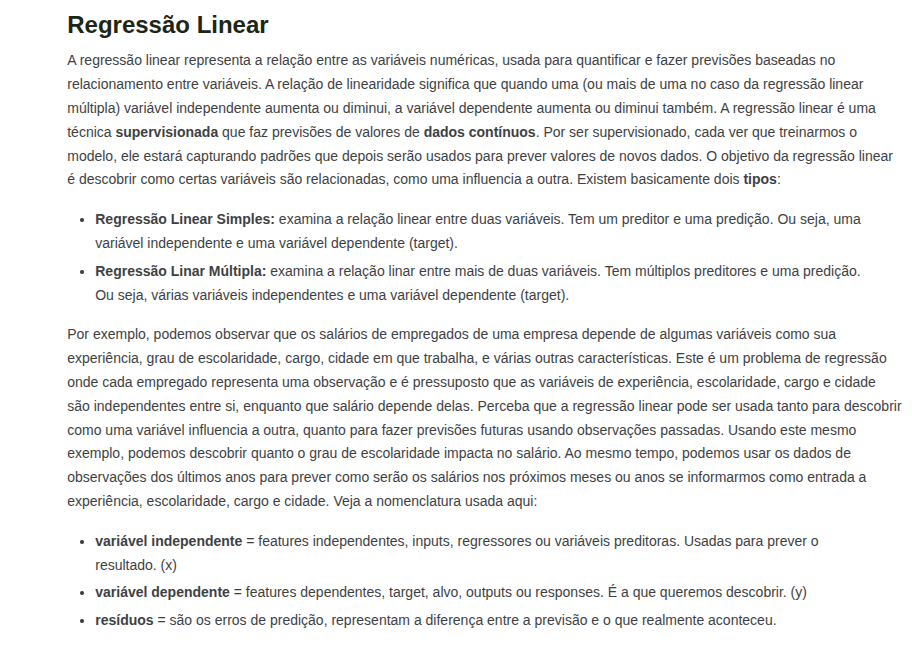

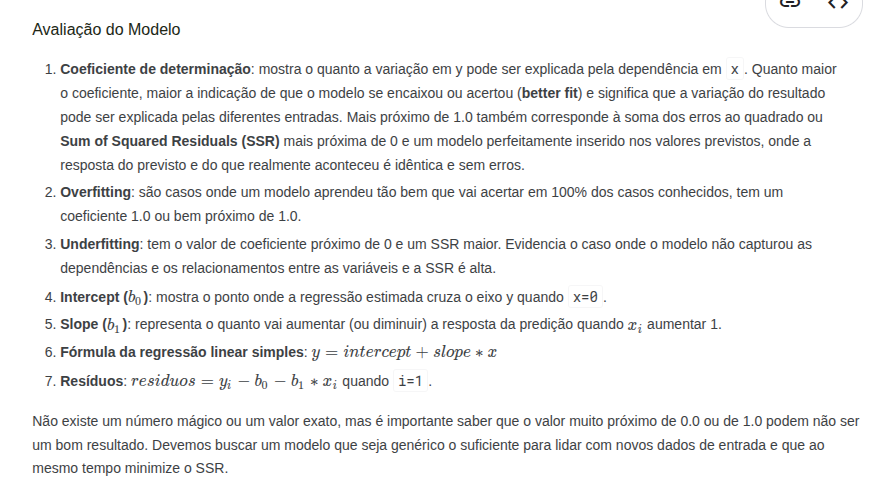

#### Exemplo de Regressão Linear

In [157]:
# Importando bibliotecas úteis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
df = pd.read_csv('Housing.csv')
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [159]:
X = np.array(df['area']).reshape(-1,1)
y = np.array(df['price'])

# Input
print(X[:10])

print('---'*30)

# Output
print(y[:10])

[[ 7420]
 [ 8960]
 [ 9960]
 [ 7500]
 [ 7420]
 [ 7500]
 [ 8580]
 [16200]
 [ 8100]
 [ 5750]]
------------------------------------------------------------------------------------------
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000]


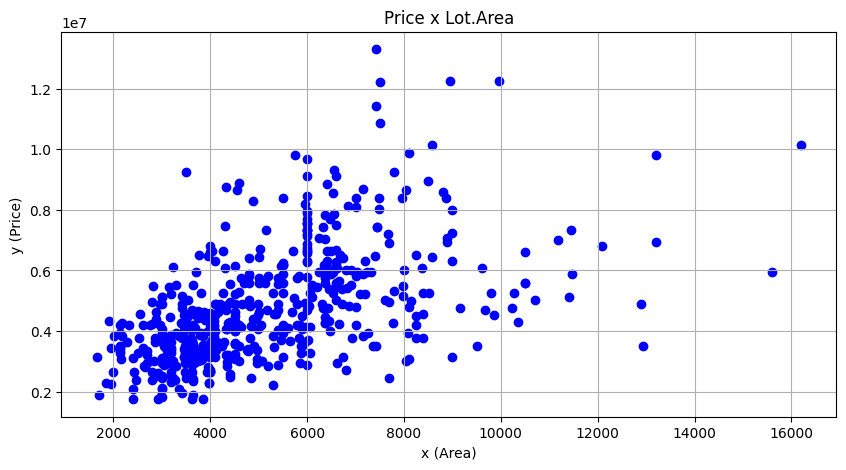

In [160]:
plt.figure(figsize=(10,5))
plt.title('Price x Lot.Area')
plt.scatter(X, y, color='blue')
plt.xlabel('x (Area)')
plt.ylabel('y (Price)')
plt.grid()
plt.show()

In [161]:
# Separando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
# Treinando e criando o modelo

model = LinearRegression().fit(X_train, y_train)

# Características do modelo

w = model.coef_
print(f"w = {w}\n")

b = model.intercept_
print(f"b = {b}")

w = [446.85400441]

b = 2466429.835072444


In [163]:
# Prevendo os valores de y para o conjunto de teste

y_hat = model.predict(X_test)

# Métricas de avaliação
print(f"Mean squared error: {mean_squared_error(y_test, y_hat):.2f}\n")
print(f"Coefficient of determination: {r2_score(y_test, y_hat):.2f}") # Baixo coeficiente de determinação 

Mean squared error: 3075976750476.65

Coefficient of determination: 0.28


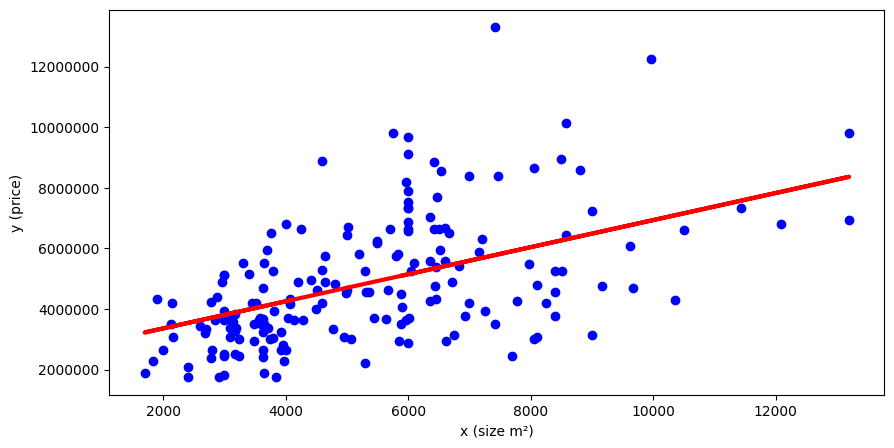

In [164]:
# Plotando os gráficos

plt.figure(figsize=(10,5))

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_hat, color = 'red', linewidth = 3)

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('x (size m²)')
plt.ylabel('y (price)')
plt.show()

### Exemplo de regressão relacionado a aula do curso

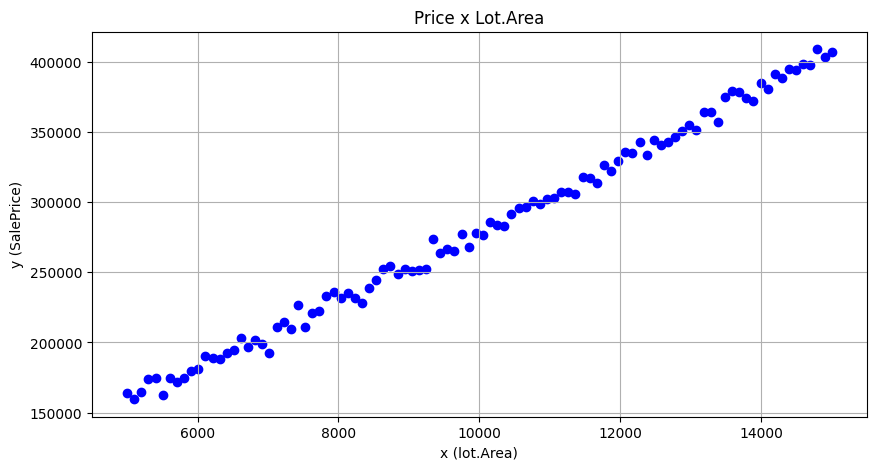

In [165]:
# Dados: 

np.random.seed(0)
x = np.linspace(5000, 15000, 100)
y = 30000 + 25*x + np.random.normal(0, 5000, 100)

plt.figure(figsize=(10,5))
plt.title('Price x Lot.Area')
plt.scatter(x, y, color='blue')
plt.xlabel('x (lot.Area)')
plt.ylabel('y (SalePrice)')
plt.grid()
plt.show()


In [166]:
# Separando os conjuntos de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.30, random_state=42)

# Criando o modelo de regressão:

model = LinearRegression().fit(X_train, y_train)

print(f'Coef: {model.coef_}')
print(f'Intercept: {model.intercept_}')

y_hat = model.predict(X_test)

Coef: [25.1059345]
Intercept: 29685.843962943094


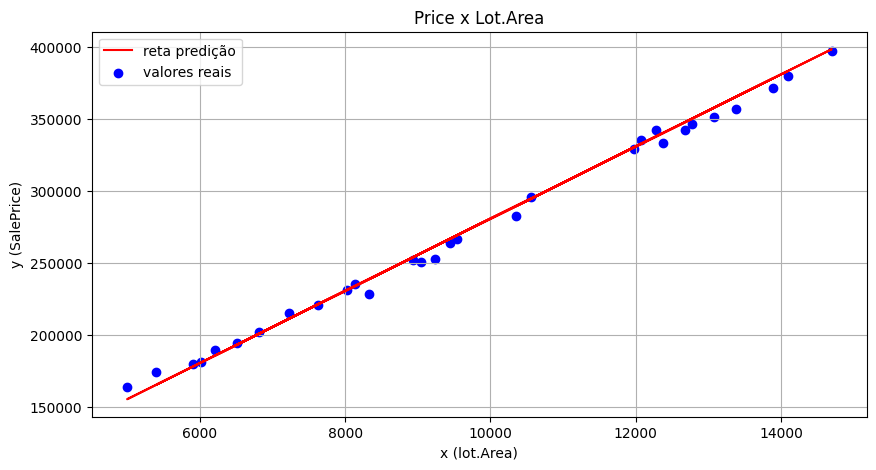

In [167]:
plt.figure(figsize=(10,5))
plt.title('Price x Lot.Area')

plt.plot(X_test, y_hat, color = 'red', label = 'reta predição')

plt.scatter(X_test, y_test, color='blue', label = 'valores reais')

plt.legend()
plt.xlabel('x (lot.Area)')
plt.ylabel('y (SalePrice)')
plt.grid()
plt.show()


In [168]:
# Métricas de erros:

print(f"Coefficient of determination: {r2_score(y_test, y_hat):.2f}") # Baixo coeficiente de determinação
print(f"Mean squared error: {mean_squared_error(y_test, y_hat):.2f}\n")

Coefficient of determination: 0.99
Mean squared error: 26495024.15



# **Cost Function**

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:

  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$
 
where 

  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$. 

In [169]:
x_train = np.array([1.0, 2.0]).reshape(-1,1) # size in 100 square feet
y_train = np.array([300.0, 500.0]) # price in 1000s of dollars

x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
print(x_train)
print(y_train)

[[1. 1.]
 [1. 2.]]
[300. 500.]


### Equação Normal

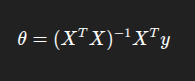

In [170]:
theta = (np.linalg.inv(x_train.T @ x_train)) @ x_train.T @ y_train
print(f'Theta 0 : {theta[0]:.2f}')
print(f'Theta 1: {theta[1]:.2f}')

Theta 0 : 100.00
Theta 1: 200.00


In [171]:
def compute_cost(x, y, w, b):
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters 

    Returns
      total_cost (float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y

    """
 
    m = x.shape[0]

    cost_sum = 0

    for i in range(m):

        f_wb = w * x[i] + b

        cost = (f_wb - y[i])**2

        cost_sum += cost

    total_cost = (1/(2*m)) * cost_sum

    return total_cost


In [172]:
def compute_cost_vectorized(x, y, w_vec, b):
    m = x.shape[0]
    J = np.zeros_like(w_vec)

    for i in range(len(w_vec)):
        f = w_vec[i] * x + b
        J[i] = (1/(2*m)) * np.sum((f - y)**2)

    return J

In [173]:
def f(x,w,b):

    return w*x + b


0.0


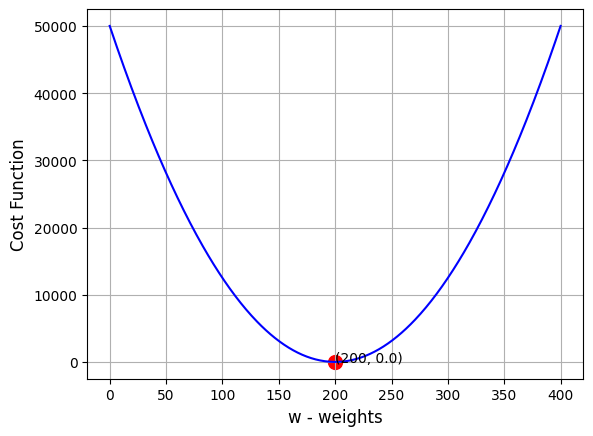

In [174]:
# Gerando vários valores de j - cost
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

w_points = np.linspace(0,400,500)
b = 100

J_vals = compute_cost_vectorized(x_train, y_train, w_points, b)


# gerando um valor de j específico
w = 200
cost = compute_cost(x_train, y_train, w, b)
print(cost)

# Plotando o gráfico
plt.plot(w_points, J_vals, color = 'blue')
plt.scatter(w, cost, color = 'red', s=100)
plt.text(w, cost, f'({w}, {cost})', fontsize = 10)

plt.ylabel('Cost Function', fontsize = 12)
plt.xlabel('w - weights', fontsize = 12)
plt.grid()
plt.show()

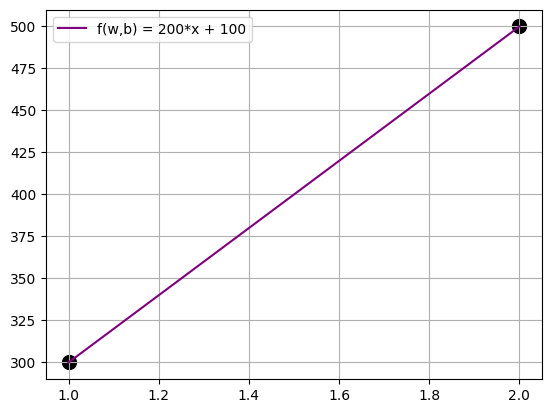

In [175]:
y_hat = f(x_train, w, b)

plt.plot(x_train, y_hat, color = 'purple', label = f'f(w,b) = {w}*x + {b}')
plt.scatter(x_train, y_train, color = 'black', s=100)

plt.legend()
plt.grid()
plt.show()


In [176]:
def gradient(x, y, n, max = 100, starts_zero_vector = False):

    # Parâmetros

    if starts_zero_vector:

        b = 0
        w = 0
        
    else:

        b = np.random.randint(0, max)
        w = np.random.randint(0, max)

    # Reta inicial

    f = w*x + b

    fig, ax = plt.subplots(1,2,figsize = (20,5))
    ax[0].scatter(x, y, color='blue')
    ax[0].plot(x, f, color='red', label = f'f(x) = {w}x + {b}')
    ax[0].legend()

    # Taxa de aprendizagem
    t = 0.01 

    for _ in range(n):

        f = w*x + b # Eq. da Reta
        
        # Derivadas Parciais
        dw = 2 * np.mean((f - y) * x)
        db = 2 * np.mean(f - y)

        w = w - t * dw
        b = b - t * db

    ax[1].plot(x, w*x + b, color='green', label = f'f(x) = {w:.2f}x + {b:.2f}')
    ax[1].scatter(x, y, color='blue')
    ax[1].legend()



    plt.show()

    return w, b

In [177]:
# Dados:
x = np.linspace(0, 10, 100)
y = 3*x + 5 + np.random.randn(100) * 2  # y = 3x + 5 + ruído


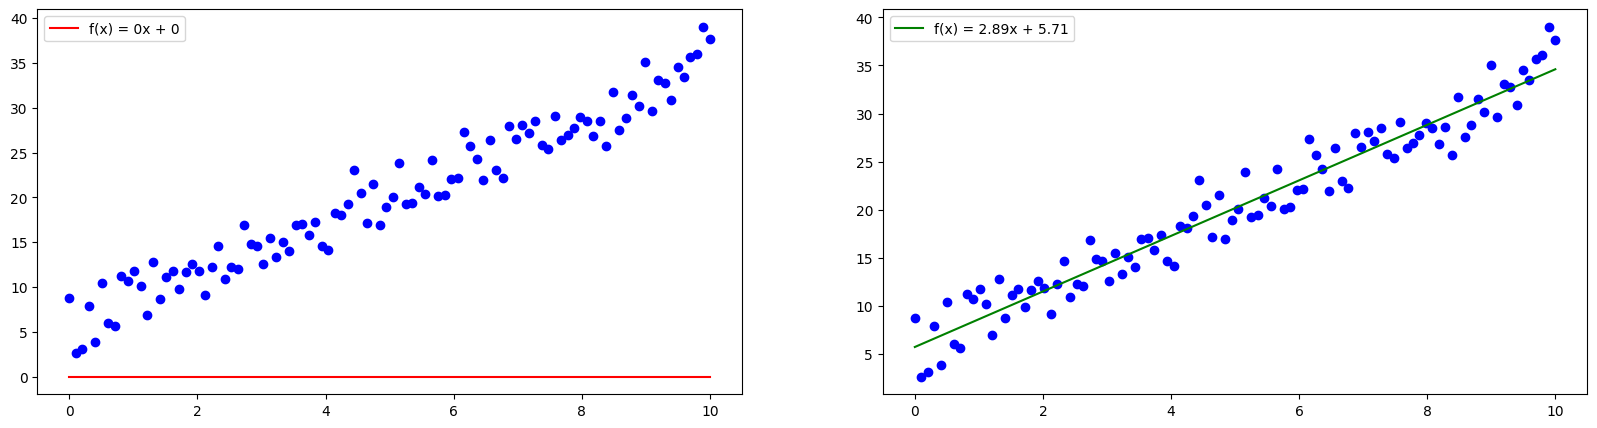

In [178]:
w, b = gradient(x, y, 1000, 10, True)

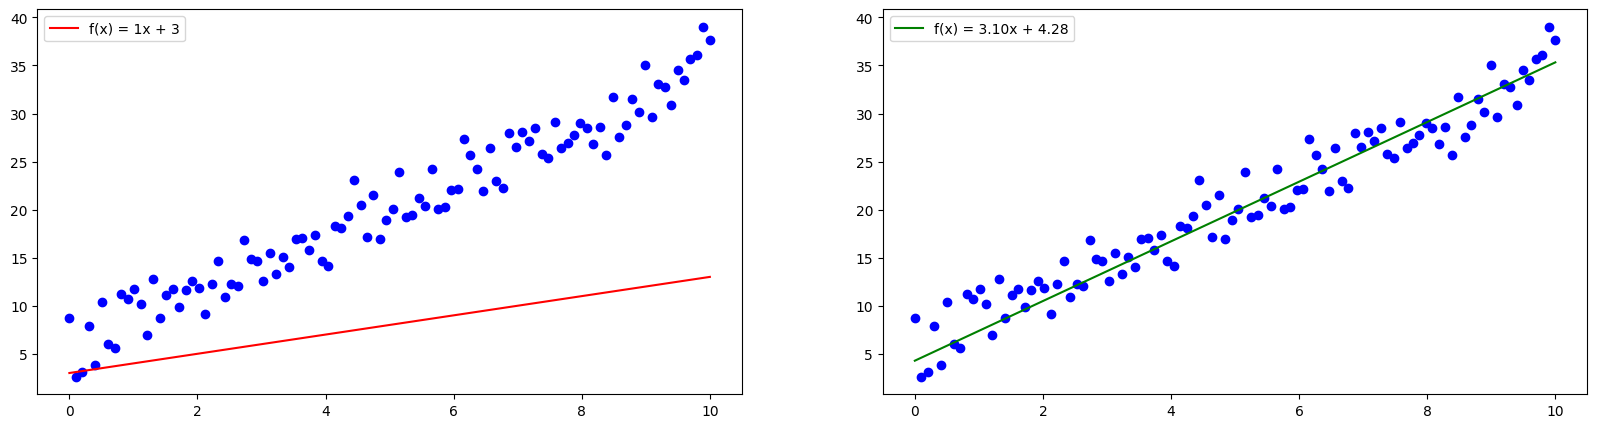

In [179]:
w, b = gradient(x, y, 100, 10)

In [180]:
print(f"Coeficiente: {w}")
print(f"Y - Intercepto: {b}")

Coeficiente: 3.1041822761130624
Y - Intercepto: 4.280298413975713


# **Gradiente Descendente**

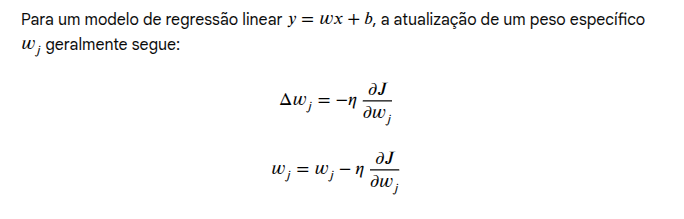

## **Resumo Geral**

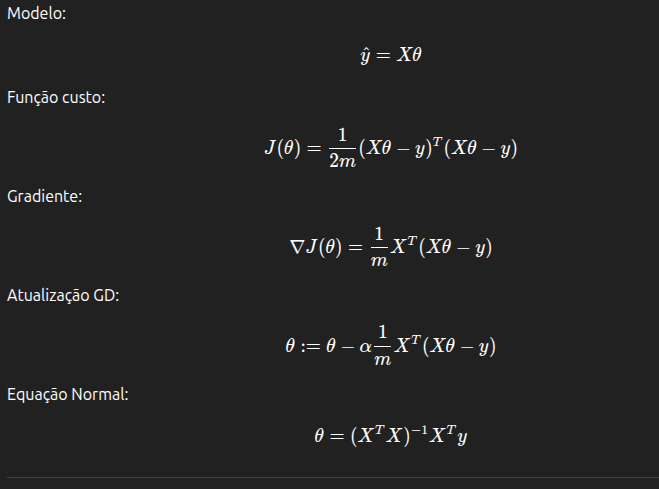

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [182]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

Compute Cost

In [183]:
def cost_function(x, y, w, b):

    m = x.shape[0]

    cost_sum = 0

    for i in range(m):

        f_wb = w * x[i] + b

        error = (f_wb - y[i])**2

        cost_sum += error

    j_wb = cost_sum * (1/(m*2))

    return j_wb

Gradient Descent

In [184]:
def gradient_descent(x, y, cost_function, n = 10000, rate = 0.01, w = 0, b = 0):

    J_history = []
    p_history = []

    for i in range(n):

        f_wb = w * x + b

        dw = np.mean((f_wb - y)*x)
        db = np.mean(f_wb - y)

        w = w - rate * dw
        b = b - rate * db

        if i < 100000 :

            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

    return w, b, J_history, p_history

In [185]:
w, b, J_history, p_history = gradient_descent(x_train, y_train, cost_function, 10000)

print(len(J_history))

print(f'coeficiente (w) : {w}')
print(f'Intercepto (b) : {b}')

10000
coeficiente (w) : 199.99285075131766
Intercepto (b) : 100.011567727362


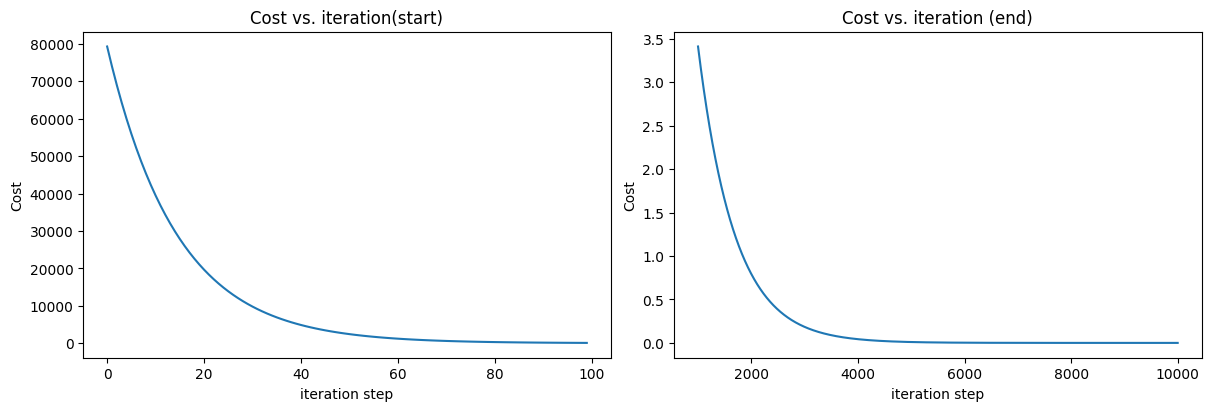

In [186]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])

ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [187]:
print(f'f(x) = {w:.1f}x + {b:.1f}')

f(x) = 200.0x + 100.0
